In [372]:
# import basic libraries
import os, json
import pandas as pd
import numpy as np
import glob
pd.options.mode.chained_assignment = None 
import networkx as nx
import matplotlib.pyplot as plt
df = pd.read_csv('one_replies.csv', index_col=0)


In [373]:
df.head(5)

,text,ts,user,real_name,to
0,<https://www.youtube.com/watch?v=meFxq3-mNEc>,1.620031e+09,U01RSRE0N3D,Kosta M,U01RRV4JX6Z
1,<@U01RSRE0N3D> <https://www.youtube.com/watch?...,1.616773e+09,U01RXCQHMHT,Tony H,U01RSRE0N3D
2,<https://www.youtube.com/watch?v=OlZsZfXkYjk>,1.619115e+09,U01S1CWGTU4,Antonio S,U01S7KCL3DF
3,<https://youtu.be/SOJSM46nWwo> <@U01S1CWGTU4> ...,1.619116e+09,U01RKN0EGDV,Marian M,U01RW2X7S9Z
4,<https://open.spotify.com/playlist/37i9dQZF1E4...,1.618824e+09,U01RW2X7S9Z,Alexandre S,U01RW140HBP


### Edgelist
who had a one to one conversation

In [374]:
# drop unrelated columns and do a graph with only the real_names and to column
df_edgelist = df.copy()
df_edgelist.drop(['text','ts'], axis=1, inplace=True)
df_edgelist.rename(columns={'user' : 'from'}, inplace=True)


In [375]:
df_edgelist.head()
df_edgelist.to_csv('edgelist.csv')

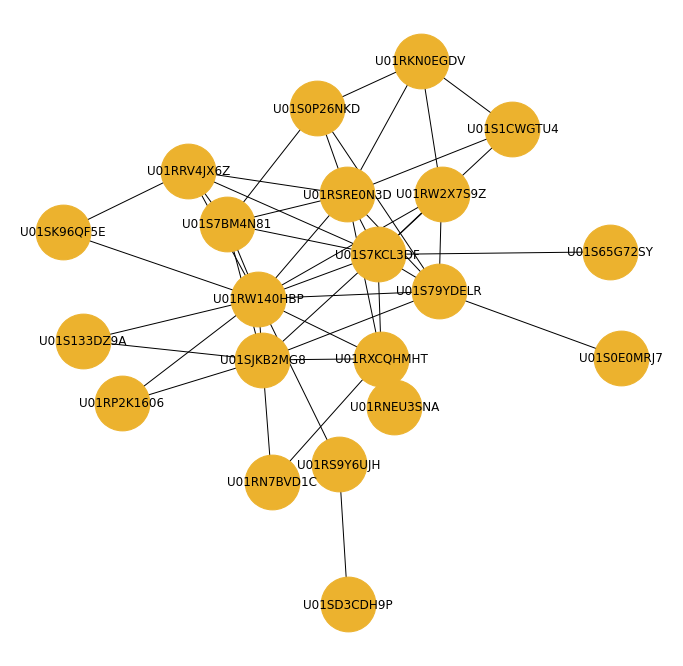

In [376]:
# normal layout
G = nx.from_pandas_edgelist(df_edgelist, source="from", target="to")
fig = plt.subplots(figsize=(12,12))
plt.margins(.10,.10)
nx.draw(G
        ,pos=nx.kamada_kawai_layout(G)
        ,with_labels=True
        ,node_color='#ecb22e'
        ,node_size=3000)
plt.show()

### Create an additional column for weight¶ from the Edgelist
This will show the frequency of conversations between the same pairs.

In [377]:
edgelist = pd.read_csv('edgelist.csv', index_col=0)


In [378]:
edgelist['weight'] = edgelist.groupby(['from'])['to'].transform('count')


In [379]:
edgelist

,from,real_name,to,weight
0,U01RSRE0N3D,Kosta M,U01RRV4JX6Z,4
1,U01RXCQHMHT,Tony H,U01RSRE0N3D,10
2,U01S1CWGTU4,Antonio S,U01S7KCL3DF,3
3,U01RKN0EGDV,Marian M,U01RW2X7S9Z,2
4,U01RW2X7S9Z,Alexandre S,U01RW140HBP,3
...,...,...,...,...
81,U01S65G72SY,Isabel J,U01S65G72SY,2
82,U01S79YDELR,Karina C,U01S0E0MRJ7,10
83,U01S79YDELR,Karina C,U01S7KCL3DF,10
84,U01S65G72SY,Isabel J,U01S7KCL3DF,2


### Weighted graph
To show frequency of one-to-one convos

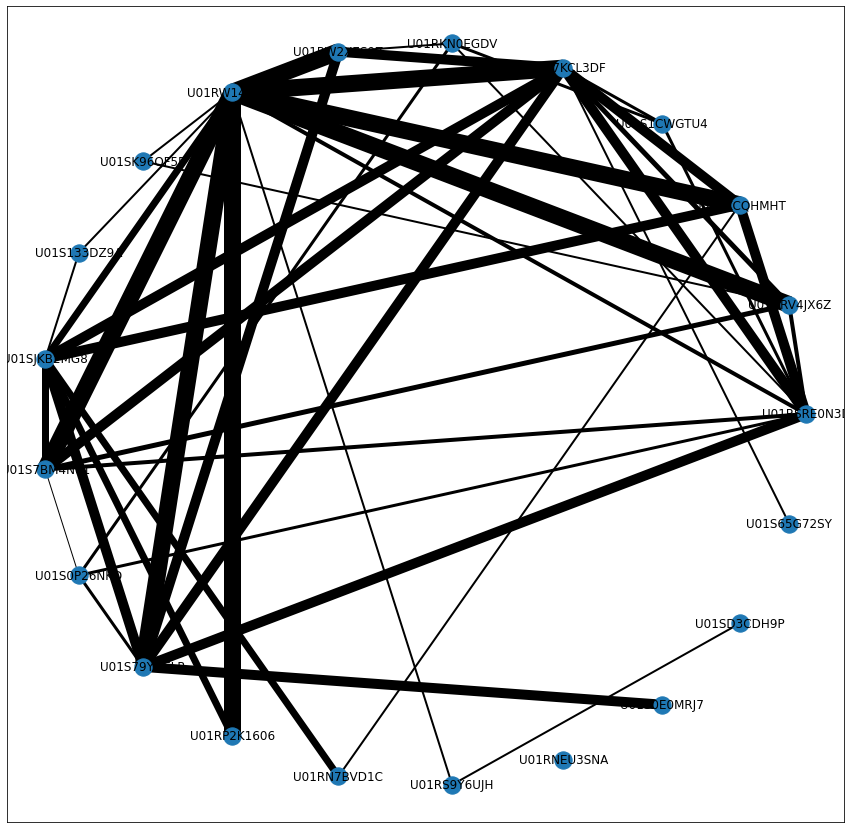

In [380]:
G = nx.from_pandas_edgelist(edgelist,'from','to', edge_attr='weight')
weight = [i['weight'] for i in dict(G.edges).values()]
labels = [i for i in dict(G.nodes).keys()]
labels = {i:i for i in dict(G.nodes).keys()}

fig, ax = plt.subplots(figsize=(15,15))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos=nx.circular_layout(G), ax = ax)
nx.draw_networkx_edges(G, pos=nx.circular_layout(G), width=weight, ax=ax)
nx.draw_networkx_labels(G, pos=nx.circular_layout(G), ax=ax)
plt.show()

### Get unique connections of users
Why are the degree and unique connections are different??

In [381]:
# get unique connections of users
unique_users = list(df.user.unique())
#print(unique_users)

counter = {}
for u in unique_users:
  count = df.loc[df.user == u]['to'].nunique()
  counter[u] = count

for k,v in counter.items():
  print('User: {} has {} connections'.format(k,v))


User: U01RSRE0N3D has 3 connections
User: U01RXCQHMHT has 5 connections
User: U01S1CWGTU4 has 3 connections
User: U01RKN0EGDV has 2 connections
User: U01RW2X7S9Z has 2 connections
User: U01S7KCL3DF has 7 connections
User: U01RW140HBP has 9 connections
User: U01RRV4JX6Z has 4 connections
User: U01SK96QF5E has 2 connections
User: U01S133DZ9A has 2 connections
User: U01S7BM4N81 has 1 connections
User: U01S0P26NKD has 3 connections
User: U01S79YDELR has 7 connections
User: U01SJKB2MG8 has 5 connections
User: U01RN7BVD1C has 2 connections
User: U01RS9Y6UJH has 2 connections
User: U01RNEU3SNA has 1 connections
User: U01S65G72SY has 2 connections


In [382]:
# Get degree (connections of each user)
G.degree

DegreeView({'U01RSRE0N3D': 9, 'U01RRV4JX6Z': 7, 'U01RXCQHMHT': 7, 'U01S1CWGTU4': 3, 'U01S7KCL3DF': 12, 'U01RKN0EGDV': 4, 'U01RW2X7S9Z': 4, 'U01RW140HBP': 14, 'U01SK96QF5E': 2, 'U01S133DZ9A': 2, 'U01SJKB2MG8': 8, 'U01S7BM4N81': 6, 'U01S0P26NKD': 4, 'U01S79YDELR': 9, 'U01RP2K1606': 2, 'U01RN7BVD1C': 4, 'U01RS9Y6UJH': 2, 'U01RNEU3SNA': 2, 'U01S0E0MRJ7': 1, 'U01SD3CDH9P': 1, 'U01S65G72SY': 3})

### Centrality graphs
to show how important a node or edge is in relation to the whole network


First we need to add the real names of the users into the graph, for that we need a little cleaning on that column


In [383]:
# rename columns so their content is clear
edgelist.rename(columns={'from': 'from_ID', 'real_name': 'from_real_name', 'to': 'to_ID'}, inplace=True)
edgelist

,from_ID,from_real_name,to_ID,weight
0,U01RSRE0N3D,Kosta M,U01RRV4JX6Z,4
1,U01RXCQHMHT,Tony H,U01RSRE0N3D,10
2,U01S1CWGTU4,Antonio S,U01S7KCL3DF,3
3,U01RKN0EGDV,Marian M,U01RW2X7S9Z,2
4,U01RW2X7S9Z,Alexandre S,U01RW140HBP,3
...,...,...,...,...
81,U01S65G72SY,Isabel J,U01S65G72SY,2
82,U01S79YDELR,Karina C,U01S0E0MRJ7,10
83,U01S79YDELR,Karina C,U01S7KCL3DF,10
84,U01S65G72SY,Isabel J,U01S7KCL3DF,2


In [384]:
# create a dictionary with the right keys
real_name_dict = pd.Series(edgelist.from_real_name.values,index=edgelist.from_ID).to_dict()
real_name_dict

{'U01RSRE0N3D': 'Kosta M',
 'U01RXCQHMHT': 'Tony H',
 'U01S1CWGTU4': 'Antonio S',
 'U01RKN0EGDV': 'Marian M',
 'U01RW2X7S9Z': 'Alexandre S',
 'U01S7KCL3DF': 'Sam K',
 'U01RW140HBP': 'Sian D (she/her)',
 'U01RRV4JX6Z': 'Francisco E',
 'U01SK96QF5E': 'Lilla S',
 'U01S133DZ9A': 'Simon G',
 'U01S7BM4N81': 'Thamo K',
 'U01S0P26NKD': 'Jennipher K',
 'U01S79YDELR': 'Karina C',
 'U01SJKB2MG8': 'Florian T',
 'U01RN7BVD1C': 'Josephine B',
 'U01RS9Y6UJH': 'Neil C',
 'U01RNEU3SNA': 'Peter G',
 'U01S65G72SY': 'Isabel J'}

In [385]:
# iterate through the real_name_dict and if keys are matching to the to_ID column, append the key to a new column named 'to_real_name'
real_name_dict = dict(zip(edgelist['from_ID'],
                          edgelist['from_real_name']))

def name_mapper(name):
  return real_name_dict.get(name)

edgelist['to_real_name'] = edgelist['to_ID'].apply(name_mapper)
edgelist = edgelist[['from_real_name', 'to_real_name']]

In [386]:
edgelist['from_real_name'] = edgelist['from_real_name'].replace(['Sian D (she/her)'],['Sian D'])
edgelist['to_real_name'] = edgelist['to_real_name'].replace(['Sian D (she/her)'],['Sian D'])

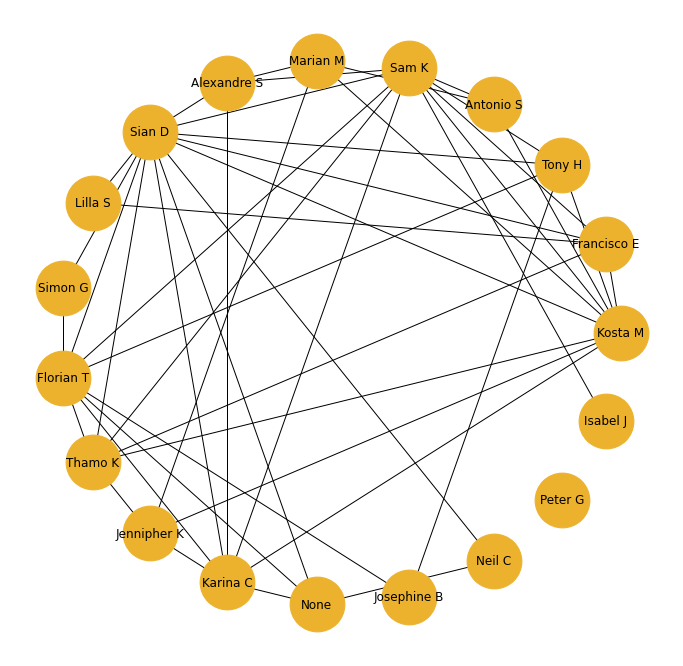

In [387]:
# circular layout normal
G_name = nx.from_pandas_edgelist(edgelist, source="from_real_name", target="to_real_name")
fig = plt.subplots(figsize=(12,12))
plt.margins(.10,.10)
nx.draw(G_name
        ,pos=nx.circular_layout(G_name)
        ,with_labels=True
        ,node_color='#ecb22e'
        ,node_size=3000)
plt.show()

### Directed graph
To show information flow

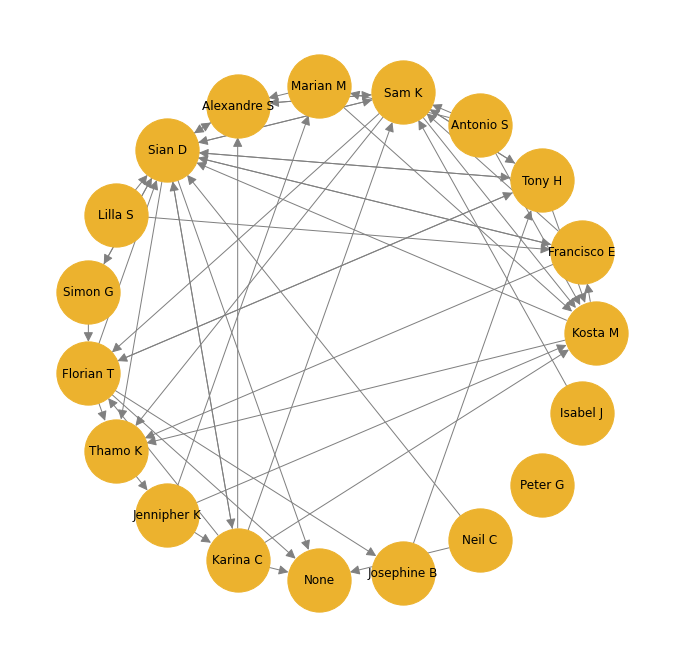

In [401]:
G_name_dir = nx.from_pandas_edgelist(edgelist
                                ,source="from_real_name"
                                ,target="to_real_name"
                                ,create_using=nx.DiGraph())

fig = plt.subplots(figsize=(12,12))
plt.margins(.10,.10)
nx.draw(G_name_dir
        ,pos=nx.circular_layout(G_name_dir)
        ,with_labels=True
        ,node_color='#ecb22e'
        ,node_size=4000
        ,font_color='black'
        ,edge_color='grey'
        ,arrowsize=20)
plt.show()

In [389]:
G_name_dir.nodes()

NodeView(('Kosta M', 'Francisco E', 'Tony H', 'Antonio S', 'Sam K', 'Marian M', 'Alexandre S', 'Sian D', 'Lilla S', 'Simon G', 'Florian T', 'Thamo K', 'Jennipher K', 'Karina C', None, 'Josephine B', 'Neil C', 'Peter G', 'Isabel J'))

### Degree Centrality
To show of all the nodes in the network, what percentage of them are connected to this one?" 

### Trying the method from Eric Sims
"Because every node has a centrality, our output will show every single node, which can be overwhelming when looking at a large network. Also, because dictionaries are unordered, we can't just take the first 10 elements of the dictionary."

He made this filter_dict helper function to filter the top n values from a dictionary.

In [390]:
def filter_dict(dict_to_filter, method='top_n', top_n=10, value_cutoff=.01):
    """
    Return a dictionary filtered to either the top n entries sorted by values or
    all entries with values greater than or equal to a specific threshold.
    
    dict_to_filter : dictionary
    
    method : string (default 'top_n', 'value_cutoff')
        Selects whether to filter dictionary by top n values or by specified
        value cutoff.
    
    top_n : integer (default 10)
        The number of key value pairs you want included in the resulting
        filtered dictionary.
    
    value_cutoff : float (default .01)
        If the 'value_cutoff' method is selected, provide a float to filter
        the resulting filtered dictionary.
    
    Examples:
        filter_dict(nx.degree_centrality(G))
        filter_dict(nx.degree_centrality(G), method='value_cutoff')
        filter_dict(nx.degree_centrality(G), top_n=15)
        
    """
    filtered_dict = dict()
    
    if method == 'value_cutoff':
    
        for (key, value) in dict_to_filter.items():
            if value >= value_cutoff:
                filtered_dict[key] = value
        
        # Sort the filtered dict by largest to smallest values
        filtered_dict = dict(sorted(filtered_dict.items()
                                    ,key=lambda x:x[1]
                                    ,reverse=True))
        return filtered_dict
    
    if method == 'top_n':
        filtered_dict = dict(sorted(dict_to_filter.items()
                                    ,key=lambda x:x[1]
                                    ,reverse=True)[0:top_n])
        return filtered_dict

In [391]:
print('Top 10 Nodes and their Degrees')
print(dict(sorted(nx.degree(G_name),key=lambda x:x[1],reverse=True)[0:10]))

print('\nTop 10 Nodes by Degree Centrality')
for k,v in filter_dict(nx.degree_centrality(G_name), top_n=10).items():
    print(f"{k}: {round(v,4)}")

Top 10 Nodes and their Degrees
{'Sian D': 14, 'Sam K': 12, 'Kosta M': 9, 'Karina C': 9, 'Florian T': 8, 'Francisco E': 7, 'Tony H': 7, 'Thamo K': 6, 'Marian M': 4, 'Alexandre S': 4}

Top 10 Nodes by Degree Centrality
Sian D: 0.7778
Sam K: 0.6667
Kosta M: 0.5
Karina C: 0.5
Florian T: 0.4444
Francisco E: 0.3889
Tony H: 0.3889
Thamo K: 0.3333
Marian M: 0.2222
Alexandre S: 0.2222


In [392]:
# Create list of top nodes
high_degree_nodes = list(filter_dict(nx.degree_centrality(G_name), top_n=10))

# Assign different color to high-degree nodes 
colors = ['C1' if i in high_degree_nodes else 'C0' for i in G_name.nodes]

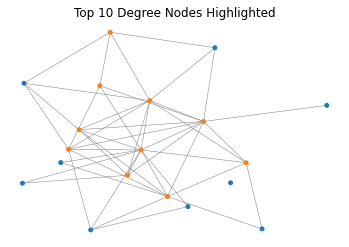

In [393]:
# High-degree nodes highlighted
fig = plt.subplots(figsize=(6,4))
# plt.margins(.1,.1)

plt.title("Top 10 Degree Nodes Highlighted")
nx.draw(G_name
        ,pos=nx.kamada_kawai_layout(G_name)
        ,node_size=15
        ,width=.5
        ,node_color=colors
        ,edge_color='gray')
plt.show()

### Betweenness centrality
How many shortest paths go through this node/edge?

In [394]:
betweenness_centrality = filter_dict(nx.betweenness_centrality(G_name), top_n=5)
betweenness_centrality

{'Sian D': 0.2733016438898792,
 'Sam K': 0.18250148544266193,
 'Kosta M': 0.116369578134284,
 'Florian T': 0.09847494553376906,
 'Karina C': 0.05461477520301051}

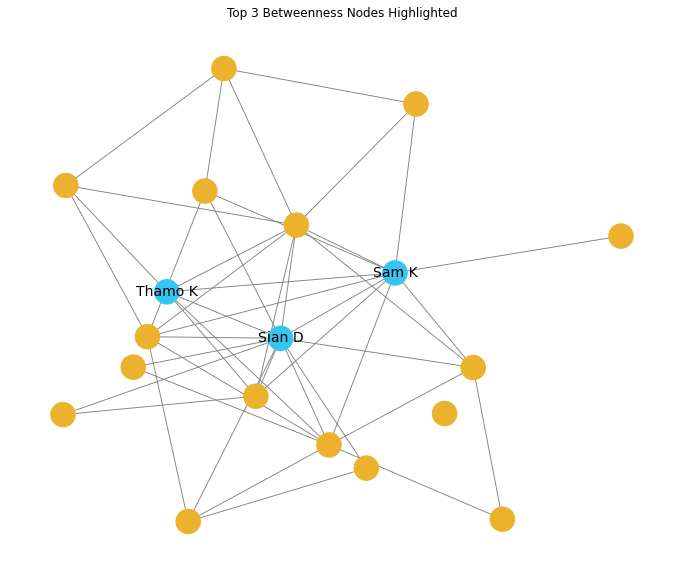

In [395]:
# Assign different color to high-closeness nodes 
colors = ['#36c5f0' if i in ('Sian D', 'Sam K', 'Thamo K') else '#ecb22e' for i in G_name.nodes]

# Create a dictionary to only label these high-closeness nodes
node_labels = [i if i in ('Sian D', 'Sam K', 'Thamo K') else '' for i in G_name.nodes]
keys = list(G_name.nodes())
values = node_labels
labels = dict(zip(keys, values))

# Plot Star Wars w/ high-betweenness nodes highlighted
fig = plt.subplots(figsize=(12,10))
plt.margins(.1,.1)

plt.title("Top 3 Betweenness Nodes Highlighted")
nx.draw(G_name
        ,pos=nx.kamada_kawai_layout(G_name)
        ,node_size=600
        ,width=.9
        ,with_labels=True
        ,labels=labels
        ,font_size=14
        ,node_color=colors
        ,edge_color='gray')
plt.show()

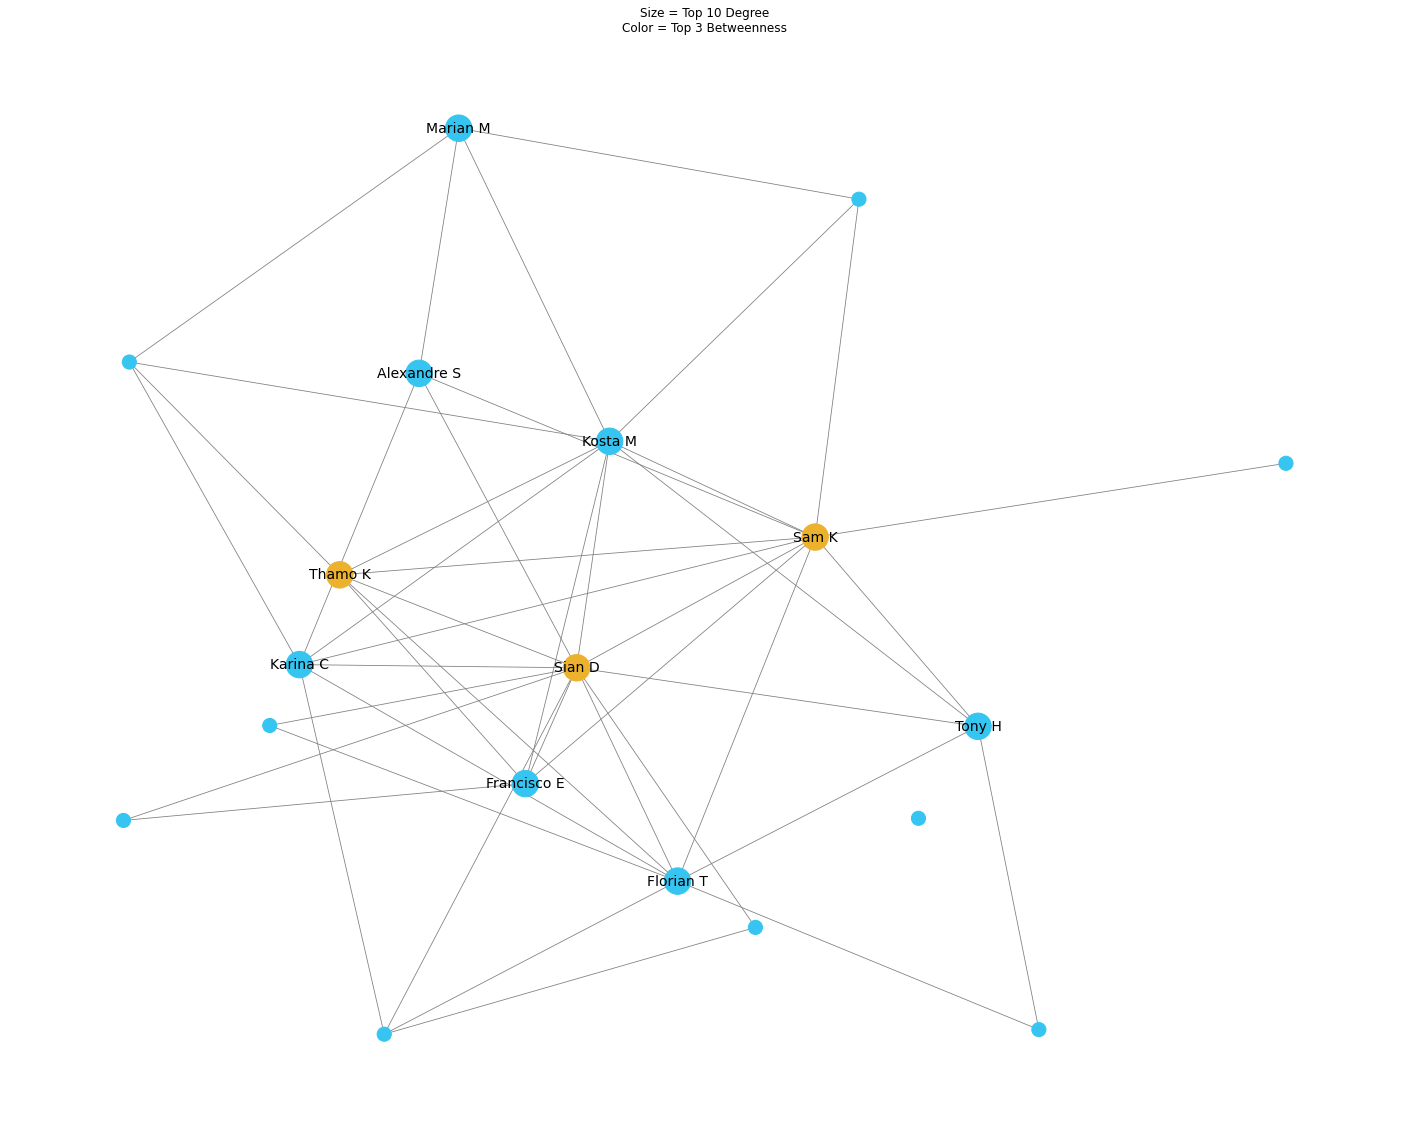

In [396]:

# Assign different color to high-degree nodes 
node_size = [700 if i in high_degree_nodes else 200 for i in G_name.nodes]
# node_size = [x*50 for x in list(dict(nx.degree(G_sw)).values())]  # Degree size

# Assign different color to high-closeness nodes 
colors = ['#ecb22e' if i in ('Sian D', 'Sam K', 'Thamo K') else '#36c5f0' for i in G_name.nodes]

# Create a dictionary to only label these high-closeness nodes
node_labels = [i if i in ('Sian D', 'Sam K', 'Thamo K', 'Kosta M', 'Karina C', 'Florian T', 'Francisco E', 'Tony H', 'Thamo K', 'Marian M', 'Alexandre S') else '' for i in G_name.nodes]
keys = list(G_name.nodes())
values = node_labels
labels = dict(zip(keys, values))

# Plot Star Wars w/ high-betweenness nodes highlighted
fig = plt.subplots(figsize=(25,20))
plt.margins(.1,.1)

plt.title("Size = Top 10 Degree\nColor = Top 3 Betweenness")
nx.draw(G_name
        ,pos=nx.kamada_kawai_layout(G_name)
        ,node_size=node_size
        ,width=.8
        ,with_labels=True
        ,labels=labels
        ,font_size=14
        ,node_color=colors
        ,edge_color='gray')
plt.show()

### Calculate degree frequency

In [397]:
degree_dict=dict(G_name.degree())
degree_dict=sorted(degree_dict.items(), key=lambda kv: kv[1], reverse=True)
df_degreefreq = pd.DataFrame([degree_dict])
df_degreefreq =df_degreefreq .T

In [398]:
degree_dict_list=list(degree_dict)
df_degreefreq[['from_ID', 'degree']] = df_degreefreq[0].apply(pd.Series)
del df_degreefreq[0]

In [399]:
df_degreefreq['degree'].value_counts().sort_index()

2.0     4
3.0     2
4.0     5
6.0     1
7.0     2
8.0     1
9.0     2
12.0    1
14.0    1
Name: degree, dtype: int64

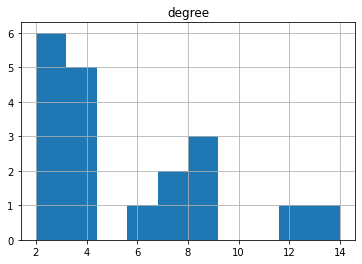

In [400]:
df_degreefreq.hist()
plt.show()